In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

input_path = "../input/"

In [3]:
train_df = pd.read_csv(input_path+'train.csv.zip')

In [4]:
test = pd.read_csv(input_path+'test.csv.zip')

In [5]:
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
label = train_df.target
train = train_df.drop(['ID_code','target'],axis=1)

In [7]:
test = test.drop(['ID_code'],axis=1)

In [8]:
train_test = pd.concat([train,test]).reset_index(drop=True)

In [9]:
train_test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [10]:
flatten_train_value_counts = pd.Series(train.values.flatten()).value_counts()
flatten_test_value_counts = pd.Series(test.values.flatten()).value_counts()

In [11]:
flatten_train_value_counts.head()

5.0215    1293
5.0179    1286
5.0209    1279
5.0214    1268
5.0188    1259
dtype: int64

In [12]:
flatten_test_value_counts.head()

5.0215    1299
5.0201    1288
5.0197    1279
5.0152    1278
5.0184    1276
dtype: int64

In [13]:
vcs_train = {}
vcs_test = {}

for col in tqdm(train.columns):
    vcs_train[col] = train.loc[:,col].value_counts()
    vcs_test[col] = test.loc[:,col].value_counts()

In [14]:
for col in tqdm(train.columns):
    vtrain = vcs_train[col]
    vtest = vcs_test[col]
    
    train[col+'_train_vcs'] = vtrain[train[col]].fillna(0).values
    train[col+'_test_vcs'] = vtest[train[col]].fillna(0).values
    train[col+'_train_test_sum_vcs'] = train[col+'_train_vcs'] + train[col+'_test_vcs']
    
    train[col+'_train_vcs_flatten'] = flatten_train_value_counts[train[col]].fillna(0).values
    train[col+'_test_vcs_flatten'] = flatten_test_value_counts[train[col]].fillna(0).values
    train[col+'_train_test_sum_vcs_flatten'] = train[col+'_train_vcs_flatten'] + train[col+'_test_vcs_flatten']

    
    test[col+'_train_vcs'] = vtrain[test[col]].fillna(0).values
    test[col+'_test_vcs'] = vtest[test[col]].fillna(0).values
    test[col+'_train_test_sum_vcs'] = test[col+'_train_vcs'] + test[col+'_test_vcs']

    test[col+'_train_vcs_flatten'] = flatten_train_value_counts[test[col]].fillna(0).values
    test[col+'_test_vcs_flatten'] = flatten_test_value_counts[test[col]].fillna(0).values
    test[col+'_train_test_sum_vcs_flatten'] = test[col+'_train_vcs_flatten'] + test[col+'_test_vcs_flatten']    

In [15]:
train['vcs_test_sum'] = train.loc[:,train.columns.str.endswith('_test_vcs')].sum(axis=1).values
train['vcs_train_sum'] = train.loc[:,train.columns.str.endswith('_train_vcs')].sum(axis=1).values
train['vcs_tt_sum'] = train.loc[:,train.columns.str.endswith('_train_test_sum_vcs')].sum(axis=1).values

train['vcs_test_sum_flatten'] = train.loc[:,train.columns.str.endswith('_test_vcs_flatten')].sum(axis=1).values
train['vcs_train_sum_flatten'] = train.loc[:,train.columns.str.endswith('_train_vcs_flatten')].sum(axis=1).values
train['vcs_tt_sum_flatten'] = train.loc[:,train.columns.str.endswith('_train_test_sum_vcs_flatten')].sum(axis=1).values

test['vcs_test_sum'] = test.loc[:,test.columns.str.endswith('_test_vcs')].sum(axis=1).values
test['vcs_train_sum'] = test.loc[:,test.columns.str.endswith('_train_vcs')].sum(axis=1).values
test['vcs_tt_sum'] = test.loc[:,test.columns.str.endswith('_train_test_sum_vcs')].sum(axis=1).values

test['vcs_test_sum_flatten'] = test.loc[:,test.columns.str.endswith('_test_vcs_flatten')].sum(axis=1).values
test['vcs_train_sum_flatten'] = test.loc[:,test.columns.str.endswith('_train_vcs_flatten')].sum(axis=1).values
test['vcs_tt_sum_flatten'] = test.loc[:,test.columns.str.endswith('_train_test_sum_vcs_flatten')].sum(axis=1).values

In [16]:
train['vcs_test_sum_nulls'] = (train.loc[:,train.columns.str.endswith('_test_vcs')] == 0).astype(int).sum(axis=1).values
train['vcs_test_sum_ones'] = (train.loc[:,train.columns.str.endswith('_test_vcs')] == 1).astype(int).sum(axis=1).values

train['vcs_train_sum_nulls'] = (train.loc[:,train.columns.str.endswith('_train_vcs')] == 0).astype(int).sum(axis=1).values
train['vcs_train_sum_ones'] = (train.loc[:,train.columns.str.endswith('_train_vcs')] == 1).astype(int).sum(axis=1).values

train['vcs_tt_sum_nulls'] = (train.loc[:,train.columns.str.endswith('_train_test_sum_vcs')] == 0).astype(int).sum(axis=1).values
train['vcs_tt_sum_ones'] = (train.loc[:,train.columns.str.endswith('_train_test_sum_vcs')] == 1).astype(int).sum(axis=1).values



test['vcs_test_sum_nulls'] = (test.loc[:,test.columns.str.endswith('_test_vcs')] == 0).astype(int).sum(axis=1).values
test['vcs_test_sum_ones'] = (test.loc[:,test.columns.str.endswith('_test_vcs')] == 1).astype(int).sum(axis=1).values

test['vcs_train_sum_nulls'] = (test.loc[:,test.columns.str.endswith('_train_vcs')] == 0).astype(int).sum(axis=1).values
test['vcs_train_sum_ones'] = (test.loc[:,test.columns.str.endswith('_train_vcs')] == 1).astype(int).sum(axis=1).values

test['vcs_tt_sum_nulls'] = (test.loc[:,test.columns.str.endswith('_train_test_sum_vcs')] == 0).astype(int).sum(axis=1).values
test['vcs_tt_sum_ones'] = (test.loc[:,test.columns.str.endswith('_train_test_sum_vcs')] == 1).astype(int).sum(axis=1).values

In [17]:
train['vcs_test_sum_ones_flatten'] = (train.loc[:,train.columns.str.endswith('_test_vcs_flatten')] == 1).astype(int).sum(axis=1).values

train['vcs_train_sum_ones_flatten'] = (train.loc[:,train.columns.str.endswith('_train_vcs_flatten')] == 1).astype(int).sum(axis=1).values

train['vcs_tt_sum_ones_flatten'] = (train.loc[:,train.columns.str.endswith('_train_test_sum_vcs_flatten')] == 1).astype(int).sum(axis=1).values



test['vcs_test_sum_ones_flatten'] = (test.loc[:,test.columns.str.endswith('_test_vcs_flatten')] == 1).astype(int).sum(axis=1).values

test['vcs_train_sum_ones_flatten'] = (test.loc[:,test.columns.str.endswith('_train_vcs_flatten')] == 1).astype(int).sum(axis=1).values

test['vcs_tt_sum_ones_flatten'] = (test.loc[:,test.columns.str.endswith('_train_test_sum_vcs_flatten')] == 1).astype(int).sum(axis=1).values

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

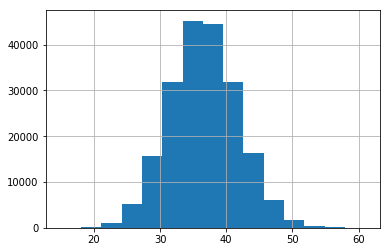

In [19]:
train.vcs_tt_sum_ones.hist(bins=15)

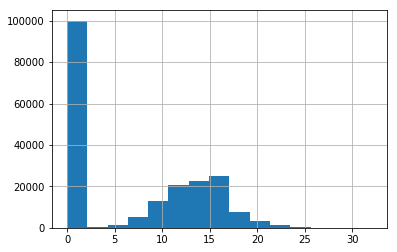

In [20]:
test.vcs_tt_sum_ones.hist(bins=15)

In [23]:
test_filtered = test[test.vcs_tt_sum_ones>0]

In [25]:
test_filtered.to_pickle(input_path+'test_filtered.pkl')